In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
obs = pd.read_csv('observations.csv')
info = pd.read_csv('species_info.csv')

In [4]:
print(obs.head())
print(obs.isna().sum())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    0
park_name          0
observations       0
dtype: int64


In [5]:
print(info.head())
print(info.isna().sum())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [6]:
# Merge the two datasets with scientific name as key
data = pd.merge(obs, info, on=['scientific_name'])

# Rename park name values for better visibility
data.park_name = data.park_name.str.replace('National Park','')

In [7]:
# Print number of values for each species category
print(data.groupby('category').size())

category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
dtype: int64


In [8]:
# Print number of values for each conservation status
print(data.groupby('conservation_status').size())

conservation_status
Endangered             80
In Recovery            24
Species of Concern    732
Threatened             44
dtype: int64


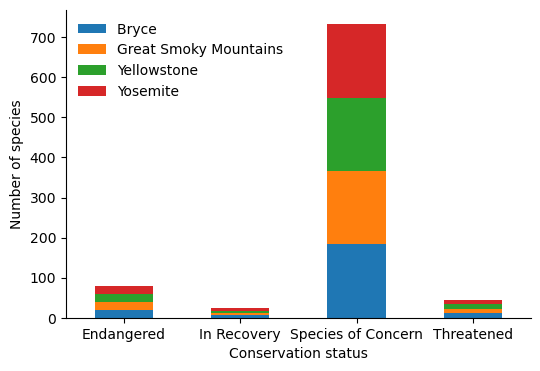

In [9]:
# Plot number of species for each conservation status and in each national park
df = data.dropna(subset='conservation_status').groupby(['conservation_status','park_name']).scientific_name.count()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_ylabel('Number of species')
ax.set_xlabel('Conservation status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.legend(title='', frameon=False)
plt.show()

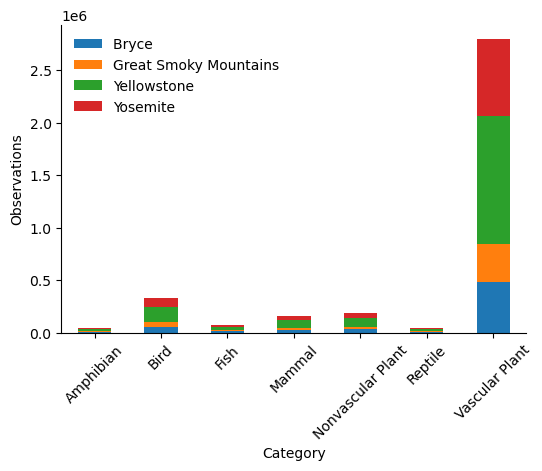

In [10]:
# Plot number of observations for each species category and in each national park
df = data.groupby(['category','park_name']).observations.sum()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_xlabel('Category')
ax.set_ylabel('Observations')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.legend(title='', frameon=False)
plt.show()

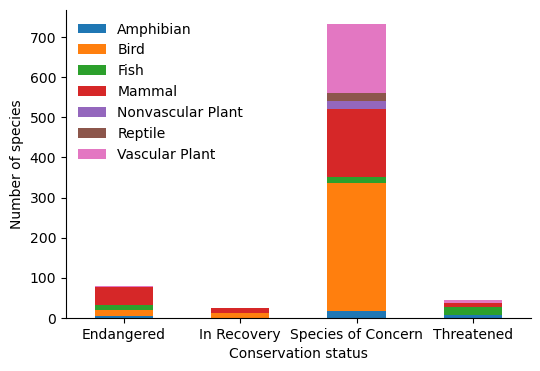

In [11]:
# Plot number of species for each conservation status (removing nans) and species category
df = data.dropna(subset='conservation_status').groupby(['conservation_status','category']).scientific_name.count()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_ylabel('Number of species')
ax.set_xlabel('Conservation status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.legend(title='', frameon=False)
plt.show()

In [13]:
# Print specie per category that has the maximum number of observations in each national park
data.groupby(['park_name','category'])['observations'].max()
obs_max = data.loc[data.groupby(['park_name','category'])["observations"].idxmax()]
print(obs_max.drop(columns=['conservation_status','common_names']).reset_index(drop=True))

                        scientific_name               park_name  observations  \
0                        Rana sylvatica                  Bryce            133   
1                         Bubulcus ibis                  Bryce            164   
2                   Notropis photogenis                  Bryce            154   
3                      Martes americana                  Bryce            167   
4               Brachythecium rutabulum                  Bryce            156   
5             Lampropeltis getula nigra                  Bryce            155   
6                  Valerianella radiata                  Bryce            176   
7                        Rana palustris  Great Smoky Mountains            119   
8                     Branta hutchinsii  Great Smoky Mountains            139   
9                      Lepomis gibbosus  Great Smoky Mountains            133   
10                    Lasiurus borealis  Great Smoky Mountains            127   
11                Pylaisiell